# Why is mobile internet so expensive in African countries?

* average price per continent (bars, median)
* price range in African countries (lollipop, median price)
* development of prices on continents over time (line, over time)
* development of prices in African countries over time (slope, 5 or 10 years)

Source: https://www.cable.co.uk/mobiles/worldwide-data-pricing/

Data from 5,554 mobile data plans in 228 countries were gathered and analysed by Cable.co.uk between 3 February and 25 February 2020. The average cost of one gigabyte (1GB) was then calculated and compared to form a worldwide mobile data pricing league table.

Methodology: https://s3-eu-west-1.amazonaws.com/assets.cable.co.uk/mobile-data-cost/global-broadband-pricing-study-2020-methodology.pdf

* "Plans measured": Researchers first established the mobile data providers in each country before selecting one SIM plan from each data amount they offer. A country with eight providers, for example, each offering three different SIM data sizes, will have 24 plans recorded (...) Packages were recorded up to a maximum of 60 per country – records beyond this number have negligible impact on the average (...) This number will always be between 3 and 60.
* "Average price": Averages are calculated as the MEDIAN of all recorded package prices/data limits. (...) The average monthly cost of 1GB of data for each country as a whole is calculated as the MEDIAN of every plan recorded
* "Sample date" / Price data : The 'Sample date' column is very important as it represents the day the data was collected for that particular country. It is a snapshot. Prices change all the time and therefore may be different by the time you go about viewing and/or utilising our data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium
pyo.init_notebook_mode(connected=True)
cf.go_offline()
import altair as alt
from vega_datasets import data

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
Excluded_countries = pd.read_excel('data/mobile_data_price_comparison_data-2021.xlsx',sheet_name='Excluded countries and territor')
Excluded_countries.head(20)

,Country code,Name,Continental region,MIssing data reason
0,CW,Christmas Island,CARIBBEAN,NO PROVIDERS
1,ER,Eritrea,NORTHERN AFRICA,NO PROVIDERS
2,KP,North Korea,CARIBBEAN,NO PROVIDERS
3,MH,Marshall Islands,OCEANIA,NO PROVIDERS
4,PM,St. Pierre and Miquelon,CARIBBEAN,NO PROVIDERS
5,SS,South Sudan,SUB-SAHARAN AFRICA,NO PROVIDERS
6,TT,Tuvalu,OCEANIA,NO PROVIDERS
7,VA,Vatican City (Holy See),Europe,NO PROVIDERS
8,VE,Venezuela,SOUTH AMERICA,HYPERINFLATION
9,WF,Wallis and Futuna,OCEANIA,NO PROVIDERS


In [3]:
df = pd.read_excel('data/mobile_data_price_comparison_data-2021.xlsx')
df.head()

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date,Average price of 1GB (USD – 2020),Average price of 1GB (USD – 2019)
0,1,IL,Israel,NEAR EAST,27,0.1750,ILS,0.303655,0.053140,0.05990,0.018189,69.0000,20.952209,2021-02-08,0.113710,0.901251
1,2,KG,Kyrgyzstan,CIS (FORMER USSR),20,12.7500,KGS,0.011792,0.150354,8.25000,0.097288,600.0000,7.075471,2021-02-10,0.207352,0.269120
2,3,FJ,Fiji,OCEANIA,18,0.4000,FJD,0.484099,0.193639,0.09375,0.045384,1.7475,0.845962,2021-02-04,0.588254,3.573233
3,4,IT,Italy,WESTERN EUROPE,29,0.2245,EUR,1.183180,0.265624,0.07495,0.088679,2.9900,3.537708,2021-02-09,0.433544,1.725332
4,5,SD,Sudan,SUB-SAHARAN AFRICA,33,104.0000,SDG,0.002625,0.272966,13.20000,0.034646,350.2500,0.919291,2021-02-18,0.625678,0.675885


In [4]:
df.columns

Index(['Rank', 'Country code', 'Name', 'Continental region', 'Plans measured',
       'Average price of 1GB (local currency)', 'Currency',
       'Conversion rate (USD) (Frozen 23/03/2021)',
       'Average price of 1GB (USD)', 'Cheapest 1GB (Local currency)',
       'Cheapest 1GB for 30 days (USD)', 'Most expensive 1GB (Local currency)',
       'Most expensive 1GB (USD)', 'Sample date',
       'Average price of 1GB (USD – 2020)',
       'Average price of 1GB (USD – 2019)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Rank                                       230 non-null    int64         
 1   Country code                               229 non-null    object        
 2   Name                                       230 non-null    object        
 3   Continental region                         230 non-null    object        
 4   Plans measured                             230 non-null    int64         
 5   Average price of 1GB (local currency)      230 non-null    float64       
 6   Currency                                   230 non-null    object        
 7   Conversion rate (USD) (Frozen 23/03/2021)  230 non-null    float64       
 8   Average price of 1GB (USD)                 230 non-null    float64       
 9   Cheapest 1GB (Local c

In [6]:
df[df['Plans measured']<14]

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date,Average price of 1GB (USD – 2020),Average price of 1GB (USD – 2019)
13,14,SM,San Marino,WESTERN EUROPE,2,0.366667,EUR,1.183180,0.433833,0.200000,0.236636,0.533333,0.631029,2021-02-18,1.157323,6.860578
33,34,RE,Réunion,SUB-SAHARAN AFRICA,11,0.642714,EUR,1.183180,0.760447,0.199800,0.236399,99.900000,118.199682,2021-02-17,0.723146,1.648308
41,42,HT,Haiti,CARIBBEAN,13,66.666667,HTG,0.012678,0.845189,21.666667,0.274686,150.000000,1.901675,2021-02-08,2.735677,1.251203
46,47,GP,Guadeloupe,CARIBBEAN,9,0.750000,EUR,1.183180,0.887385,0.416500,0.492794,2.998000,3.547174,2021-02-05,2.423144,6.062976
57,58,MC,Monaco,WESTERN EUROPE,3,0.916583,EUR,1.183180,1.084483,0.714143,0.844960,1.999500,2.365768,2021-02-11,0.976383,1.205816
60,61,DJ,Djibouti,SUB-SAHARAN AFRICA,7,200.000000,DJF,0.005602,1.120344,83.333333,0.466810,5000.000000,28.008600,2021-02-03,1.124000,37.924825
69,70,TO,Tonga,OCEANIA,2,2.916667,TOP,0.437850,1.277062,2.500000,1.094625,3.333333,1.459500,2021-02-22,3.406184,2.915523
78,79,IE,Ireland,WESTERN EUROPE,12,1.198500,EUR,1.183180,1.418041,0.109900,0.130031,9.840000,11.642491,2021-02-08,1.356237,3.949954
87,88,GF,French Guiana,SOUTH AMERICA,9,1.332667,EUR,1.183180,1.576785,0.690000,0.816394,4.996667,5.911956,2021-02-05,3.613017,13.406362
89,90,PW,Palau,OCEANIA,6,1.666667,USD,1.000000,1.666667,1.000000,1.000000,2.500000,2.500000,2021-02-17,2.500000,8.339286


In [7]:
# calculate span cheapest/most expensive --> hint for competition? High price range, high competition?
df['price_range_USD'] = df['Most expensive 1GB (USD)'] - df['Cheapest 1GB for 30 days (USD)']
df

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date,Average price of 1GB (USD – 2020),Average price of 1GB (USD – 2019),price_range_USD
0,1,IL,Israel,NEAR EAST,27,0.175000,ILS,0.303655,0.053140,0.059900,0.018189,69.0000,20.952209,2021-02-08,0.113710,0.901251,20.934020
1,2,KG,Kyrgyzstan,CIS (FORMER USSR),20,12.750000,KGS,0.011792,0.150354,8.250000,0.097288,600.0000,7.075471,2021-02-10,0.207352,0.269120,6.978183
2,3,FJ,Fiji,OCEANIA,18,0.400000,FJD,0.484099,0.193639,0.093750,0.045384,1.7475,0.845962,2021-02-04,0.588254,3.573233,0.800578
3,4,IT,Italy,WESTERN EUROPE,29,0.224500,EUR,1.183180,0.265624,0.074950,0.088679,2.9900,3.537708,2021-02-09,0.433544,1.725332,3.449029
4,5,SD,Sudan,SUB-SAHARAN AFRICA,33,104.000000,SDG,0.002625,0.272966,13.200000,0.034646,350.2500,0.919291,2021-02-18,0.625678,0.675885,0.884646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,MW,Malawi,SUB-SAHARAN AFRICA,5,20000.000000,MWK,0.001273,25.463940,16000.000000,20.371152,20000.0000,25.463940,2021-02-12,27.406160,3.590209,5.092788
226,227,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,16,70.000000,STN,0.442370,30.965900,30.000000,13.271100,275.0000,121.651750,2021-02-19,28.262528,5.330559,108.380650
227,228,SH,Saint Helena,SUB-SAHARAN AFRICA,4,31.009615,SHP,1.285600,39.865962,30.000000,38.568000,40.0000,51.424000,2021-02-18,52.495333,6.036561,12.856000
228,229,FK,Falkland Islands,SOUTH AMERICA,4,32.500000,FKP,1.371036,44.558670,21.666667,29.705780,60.0000,82.262160,2021-02-04,40.407575,55.469792,52.556380


In [8]:
# merge with regions 
regions = pd.read_csv('data/country-and-continent-codes-list.csv', delimiter =';')
regions.head()

,continent,region,subregion,country,M49 code,ISO-alpha3 code,ISO-alpha2 code,Other groupings
0,Asia,Southern Asia,Southern Asia,Afghanistan,4.0,AFG,AF,LDC LLDC
1,Europe,Southern Europe,Southern Europe,Albania,8.0,ALB,AL,NaN
2,Americas,Northern America,Northern America,Antarctica,10.0,ATA,AQ,NaN
3,Africa,Northern Africa,Northern Africa,Algeria,12.0,DZA,DZ,NaN
4,Oceania,Polynesia,Polynesia,American Samoa,16.0,ASM,AS,SIDS


In [9]:
df_merged = df.merge(regions, left_on="Country code", right_on="ISO-alpha2 code")
df_merged

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,Average price of 1GB (USD – 2019),price_range_USD,continent,region,subregion,country,M49 code,ISO-alpha3 code,ISO-alpha2 code,Other groupings
0,1,IL,Israel,NEAR EAST,27,0.175000,ILS,0.303655,0.053140,0.059900,...,0.901251,20.934020,Asia,Western Asia,Western Asia,Israel,376.0,ISR,IL,NaN
1,2,KG,Kyrgyzstan,CIS (FORMER USSR),20,12.750000,KGS,0.011792,0.150354,8.250000,...,0.269120,6.978183,Asia,Central Asia,Central Asia,Kyrgyzstan,417.0,KGZ,KG,LLDC
2,3,FJ,Fiji,OCEANIA,18,0.400000,FJD,0.484099,0.193639,0.093750,...,3.573233,0.800578,Oceania,Melanesia,Melanesia,Fiji,242.0,FJI,FJ,SIDS
3,4,IT,Italy,WESTERN EUROPE,29,0.224500,EUR,1.183180,0.265624,0.074950,...,1.725332,3.449029,Europe,Southern Europe,Southern Europe,Italy,380.0,ITA,IT,NaN
4,5,SD,Sudan,SUB-SAHARAN AFRICA,33,104.000000,SDG,0.002625,0.272966,13.200000,...,0.675885,0.884646,Africa,Northern Africa,Northern Africa,Sudan,729.0,SDN,SD,LDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,226,MW,Malawi,SUB-SAHARAN AFRICA,5,20000.000000,MWK,0.001273,25.463940,16000.000000,...,3.590209,5.092788,Africa,Sub-Saharan Africa,Eastern Africa,Malawi,454.0,MWI,MW,LDC LLDC
227,227,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,16,70.000000,STN,0.442370,30.965900,30.000000,...,5.330559,108.380650,Africa,Sub-Saharan Africa,Middle Africa,Sao Tome and Principe,678.0,STP,ST,LDC SIDS
228,228,SH,Saint Helena,SUB-SAHARAN AFRICA,4,31.009615,SHP,1.285600,39.865962,30.000000,...,6.036561,12.856000,Africa,Sub-Saharan Africa,Western Africa,Saint Helena,654.0,SHN,SH,NaN
229,229,FK,Falkland Islands,SOUTH AMERICA,4,32.500000,FKP,1.371036,44.558670,21.666667,...,55.469792,52.556380,Americas,South America,South America,Falkland Islands (Malvinas),238.0,FLK,FK,NaN


In [10]:
#merge with GNI per capita

#Source: https://data.worldbank.org/indicator/NY.GNP.PCAP.CD
#Methodology: https://databank.worldbank.org/reports.aspx?source=2&type=metadata&series=NY.GNP.PCAP.CD
#Measure: GNI per capita, Atlas method (current US$)
gni_pc_USD = pd.read_excel('data/WorldBank-GNIperCapita-USD Last Updated.xlsx')
gni_pc_USD = gni_pc_USD[['Country Name', 'Country Code','2019']]
gni_pc_USD.columns=(['country_name', 'country_code', 'gni_percap_cUSD'])     #change column name
gni_pc_USD.head()

,country_name,country_code,gni_percap_cUSD
0,Aruba,ABW,NaN
1,Afghanistan,AFG,530.0
2,Angola,AGO,2960.0
3,Albania,ALB,5220.0
4,Andorra,AND,NaN


In [11]:
# calculating monthly income out of yearly gni
gni_pc_USD['monthly_gni_pc_USD'] = gni_pc_USD['gni_percap_cUSD'] / 12
gni_pc_USD

,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD
0,Aruba,ABW,NaN,NaN
1,Afghanistan,AFG,530.0,44.166667
2,Angola,AGO,2960.0,246.666667
3,Albania,ALB,5220.0,435.000000
4,Andorra,AND,NaN,NaN
...,...,...,...,...
259,Kosovo,XKX,4640.0,386.666667
260,"Yemen, Rep.",YEM,NaN,NaN
261,South Africa,ZAF,6040.0,503.333333
262,Zambia,ZMB,1430.0,119.166667


In [12]:
df_merged = df_merged.merge(gni_pc_USD, left_on='ISO-alpha3 code', right_on='country_code')
df_merged

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,subregion,country,M49 code,ISO-alpha3 code,ISO-alpha2 code,Other groupings,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD
0,1,IL,Israel,NEAR EAST,27,0.175000,ILS,0.303655,0.053140,0.059900,...,Western Asia,Israel,376.0,ISR,IL,NaN,Israel,ISR,43110.0,3592.500000
1,2,KG,Kyrgyzstan,CIS (FORMER USSR),20,12.750000,KGS,0.011792,0.150354,8.250000,...,Central Asia,Kyrgyzstan,417.0,KGZ,KG,LLDC,Kyrgyz Republic,KGZ,1240.0,103.333333
2,3,FJ,Fiji,OCEANIA,18,0.400000,FJD,0.484099,0.193639,0.093750,...,Melanesia,Fiji,242.0,FJI,FJ,SIDS,Fiji,FJI,5800.0,483.333333
3,4,IT,Italy,WESTERN EUROPE,29,0.224500,EUR,1.183180,0.265624,0.074950,...,Southern Europe,Italy,380.0,ITA,IT,NaN,Italy,ITA,34530.0,2877.500000
4,5,SD,Sudan,SUB-SAHARAN AFRICA,33,104.000000,SDG,0.002625,0.272966,13.200000,...,Northern Africa,Sudan,729.0,SDN,SD,LDC,Sudan,SDN,590.0,49.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,224,NaN,Namibia,SUB-SAHARAN AFRICA,33,330.555556,NAD,0.067659,22.365058,17.666667,...,Southern Africa,Namibia,516.0,NAM,NaN,NaN,Namibia,NAM,5060.0,421.666667
204,225,TD,Chad,SUB-SAHARAN AFRICA,15,2500.000000,XAF,0.001806,23.330000,1222.222222,...,Middle Africa,Chad,148.0,TCD,TD,LDC LLDC,Chad,TCD,700.0,58.333333
205,226,MW,Malawi,SUB-SAHARAN AFRICA,5,20000.000000,MWK,0.001273,25.463940,16000.000000,...,Eastern Africa,Malawi,454.0,MWI,MW,LDC LLDC,Malawi,MWI,380.0,31.666667
206,227,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,16,70.000000,STN,0.442370,30.965900,30.000000,...,Middle Africa,Sao Tome and Principe,678.0,STP,ST,LDC SIDS,Sao Tome and Principe,STP,1930.0,160.833333


In [13]:
# enable compasion in relation to income
df_merged['2021 Average price of 1GB as share of GNI per capita %'] = df_merged['Average price of 1GB (USD)'] / df_merged ['monthly_gni_pc_USD'] * 100
df_merged['2020 Average price of 1GB as share of GNI per capita %'] = df_merged['Average price of 1GB (USD – 2020)'] / df_merged ['monthly_gni_pc_USD'] * 100
df_merged['2019 Average price of 1GB as share of GNI per capita %'] = df_merged['Average price of 1GB (USD – 2019)'] / df_merged ['monthly_gni_pc_USD'] * 100
df_merged.to_csv('full_data.csv')
df_merged

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,ISO-alpha3 code,ISO-alpha2 code,Other groupings,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %
0,1,IL,Israel,NEAR EAST,27,0.175000,ILS,0.303655,0.053140,0.059900,...,ISR,IL,NaN,Israel,ISR,43110.0,3592.500000,0.001479,0.003165,0.025087
1,2,KG,Kyrgyzstan,CIS (FORMER USSR),20,12.750000,KGS,0.011792,0.150354,8.250000,...,KGZ,KG,LLDC,Kyrgyz Republic,KGZ,1240.0,103.333333,0.145504,0.200664,0.260439
2,3,FJ,Fiji,OCEANIA,18,0.400000,FJD,0.484099,0.193639,0.093750,...,FJI,FJ,SIDS,Fiji,FJI,5800.0,483.333333,0.040063,0.121708,0.739290
3,4,IT,Italy,WESTERN EUROPE,29,0.224500,EUR,1.183180,0.265624,0.074950,...,ITA,IT,NaN,Italy,ITA,34530.0,2877.500000,0.009231,0.015067,0.059959
4,5,SD,Sudan,SUB-SAHARAN AFRICA,33,104.000000,SDG,0.002625,0.272966,13.200000,...,SDN,SD,LDC,Sudan,SDN,590.0,49.166667,0.555185,1.272566,1.374682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,224,NaN,Namibia,SUB-SAHARAN AFRICA,33,330.555556,NAD,0.067659,22.365058,17.666667,...,NAM,NaN,NaN,Namibia,NAM,5060.0,421.666667,5.303966,1.134034,2.612625
204,225,TD,Chad,SUB-SAHARAN AFRICA,15,2500.000000,XAF,0.001806,23.330000,1222.222222,...,TCD,TD,LDC LLDC,Chad,TCD,700.0,58.333333,39.994286,39.994286,39.994286
205,226,MW,Malawi,SUB-SAHARAN AFRICA,5,20000.000000,MWK,0.001273,25.463940,16000.000000,...,MWI,MW,LDC LLDC,Malawi,MWI,380.0,31.666667,80.412442,86.545768,11.337502
206,227,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,16,70.000000,STN,0.442370,30.965900,30.000000,...,STP,ST,LDC SIDS,Sao Tome and Principe,STP,1930.0,160.833333,19.253409,17.572556,3.314337


## Average price (median of medians) per continent 

In [14]:
median_price_per_continent =df_merged.groupby(by='continent')['Average price of 1GB (USD)'].median().sort_values()
median_price_per_continent

continent
Asia        1.410853
Europe      1.713179
Africa      2.583432
Americas    2.742028
Oceania     3.231533
Name: Average price of 1GB (USD), dtype: float64

In [15]:
px.bar(median_price_per_continent,title='median price per continent')

In [16]:
median_price_per_continent.iplot(kind='bar',title='median price per continent')

In [17]:
df_merged.groupby(by='continent')['monthly_gni_pc_USD'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,49.0,224.914966,270.837566,23.333333,65.000000,121.666667,275.833333,1408.333333
Americas,36.0,1325.023148,1803.140223,110.833333,457.916667,775.416667,1391.875000,9810.833333
Asia,42.0,1153.373016,1443.940802,44.166667,186.041667,394.166667,1675.833333,5098.333333
Europe,39.0,2618.098291,2000.317591,280.833333,995.416667,1933.333333,4107.916667,7125.000000
Oceania,12.0,1117.291667,1448.677912,199.166667,276.250000,442.500000,1232.916667,4591.666667


In [18]:
# should be price for Afrian continent:
120.833333 *0.02

2.41666666

In [19]:
df_merged.groupby(by='continent')['Average price of 1GB (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,50.0,5.419086,9.203756,0.272966,1.097378,2.583432,4.645873,49.671765
Americas,45.0,3.840934,3.446182,0.393602,1.895412,2.742028,4.444582,19.800000
Asia,49.0,2.569017,3.897798,0.053140,0.632238,1.410853,2.302736,21.406613
Europe,46.0,2.362976,2.000177,0.265624,1.106199,1.713179,3.075513,8.163942
Oceania,18.0,4.238882,3.123145,0.193639,1.750000,3.231533,6.869381,9.939406


In [20]:
# exclude Oceania, because for many GNI is missing
df_merged[df_merged['continent']=='Oceania']

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,ISO-alpha3 code,ISO-alpha2 code,Other groupings,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %
2,3,FJ,Fiji,OCEANIA,18,0.400000,FJD,0.484099,0.193639,0.093750,...,FJI,FJ,SIDS,Fiji,FJI,5800.0,483.333333,0.040063,0.121708,0.739290
17,18,WS,Samoa,OCEANIA,42,1.500000,WST,0.374015,0.561022,0.500000,...,WSM,WS,SIDS,Samoa,WSM,4190.0,349.166667,0.160675,3.111634,8.617323
28,29,AU,Australia,OCEANIA,46,0.913684,AUD,0.762475,0.696661,0.130000,...,AUS,AU,NaN,Australia,AUS,55100.0,4591.666667,0.015172,0.014769,0.053872
65,70,TO,Tonga,OCEANIA,2,2.916667,TOP,0.437850,1.277062,2.500000,...,TON,TO,SIDS,Tonga,TON,5000.0,416.666667,0.306495,0.817484,0.699726
82,90,PW,Palau,OCEANIA,6,1.666667,USD,1.000000,1.666667,1.000000,...,PLW,PW,SIDS,Palau,PLW,16490.0,1374.166667,0.121286,0.181928,0.606861
98,106,AS,American Samoa,OCEANIA,11,2.000000,USD,1.000000,2.000000,1.333333,...,ASM,AS,SIDS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN
105,113,GU,Guam,OCEANIA,23,2.142857,USD,1.000000,2.142857,1.000000,...,GUM,GU,SIDS,Guam,GUM,NaN,NaN,NaN,NaN,NaN
106,114,MP,Northern Mariana Islands,OCEANIA,18,2.154762,USD,1.000000,2.154762,1.000000,...,MNP,MP,SIDS,Northern Mariana Islands,MNP,NaN,NaN,NaN,NaN,NaN
111,119,PG,Papua New Guinea,OCEANIA,18,8.000000,PGK,0.282783,2.262264,2.500000,...,PNG,PG,SIDS,Papua New Guinea,PNG,2750.0,229.166667,0.987170,2.358531,5.297280
158,172,PF,French Polynesia,OCEANIA,30,423.750000,XPF,0.009913,4.200802,166.666667,...,PYF,PF,SIDS,French Polynesia,PYF,NaN,NaN,NaN,NaN,NaN


In [21]:
Average_price_continent = df_merged.groupby(by='continent')['2021 Average price of 1GB as share of GNI per capita %'].median().sort_values()
Average_price_continent

continent
Europe      0.083965
Asia        0.211528
Americas    0.309402
Oceania     0.474741
Africa      2.007273
Name: 2021 Average price of 1GB as share of GNI per capita %, dtype: float64

In [22]:
px.bar(Average_price_continent)

In [23]:
df_merged.groupby(by='continent')['2021 Average price of 1GB as share of GNI per capita %'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,49.0,5.962593,12.863944,0.070061,0.614421,2.007273,6.453337,80.412442
Americas,36.0,0.374654,0.230353,0.031467,0.213164,0.309402,0.507214,0.950576
Asia,42.0,0.425484,0.592573,0.001479,0.101011,0.211528,0.479079,3.032322
Europe,39.0,0.146070,0.150693,0.009231,0.044463,0.083965,0.210314,0.642570
Oceania,12.0,1.131941,1.390908,0.015172,0.150827,0.474741,1.584293,3.929018


In [24]:
# share of countries per continent where it is affordable
continents = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

pricing_overview = []

for continent in continents:
    continent_dict = {}
    continent_dict['continent'] = continent
    df_continent = df_merged[df_merged['continent'] == continent]
    countries_count = len(df_continent)
    country_count_expensive = len(df_continent[df_continent['2021 Average price of 1GB as share of GNI per capita %']>2.0])
    country_count_affordable = len(df_continent[df_continent['2021 Average price of 1GB as share of GNI per capita %']<=2.0])
    continent_dict['countries_expensive'] = country_count_expensive
    continent_dict['countries_affordable'] = country_count_affordable
    continent_dict['total_countries_count'] = countries_count
    continent_dict['share_expensive%'] = country_count_expensive / countries_count * 100
    continent_dict['share_affordable%'] = country_count_affordable / countries_count * 100
    pricing_overview.append(continent_dict)

affordability_overview = pd.DataFrame(pricing_overview)
affordability_overview

,continent,countries_expensive,countries_affordable,total_countries_count,share_expensive%,share_affordable%
0,Africa,25,24,50,50.000000,48.000000
1,Americas,0,36,45,0.000000,80.000000
2,Asia,2,40,49,4.081633,81.632653
3,Europe,0,39,46,0.000000,84.782609
4,Oceania,3,9,18,16.666667,50.000000


In [25]:
affordability_overview.iplot(kind='bar',x='continent',y=['countries_expensive','countries_affordable'])

## Price ranges by continent

In [26]:
Price_ranges_by_continent=df_merged.groupby(by='continent')['price_range_USD'].median().sort_values()
Price_ranges_by_continent

continent
Asia         7.256057
Oceania      9.160082
Americas     9.200619
Africa      10.897656
Europe      18.114900
Name: price_range_USD, dtype: float64

In [27]:
px.bar(Price_ranges_by_continent)

# Focus on African countries

In [28]:
africa_df = df_merged[df_merged['continent']=='Africa']
africa_df

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,ISO-alpha3 code,ISO-alpha2 code,Other groupings,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %
4,5,SD,Sudan,SUB-SAHARAN AFRICA,33,104.000000,SDG,0.002625,0.272966,13.200000,...,SDN,SD,LDC,Sudan,SDN,590.0,49.166667,0.555185,1.272566,1.374682
15,16,DZ,Algeria,NORTHERN AFRICA,20,68.333333,DZD,0.007470,0.510427,20.833333,...,DZA,DZ,NaN,Algeria,DZA,4010.0,334.166667,0.152746,0.194295,1.541332
21,22,SO,Somalia,SUB-SAHARAN AFRICA,27,0.600000,USD,1.000000,0.600000,0.181818,...,SOM,SO,LDC,Somalia,SOM,NaN,NaN,NaN,NaN,NaN
26,27,GH,Ghana,SUB-SAHARAN AFRICA,34,3.818182,GHS,0.173667,0.663091,1.000000,...,GHA,GH,NaN,Ghana,GHA,2220.0,185.000000,0.358428,0.506629,0.842113
29,30,LY,Libya,NORTHERN AFRICA,16,3.333333,LYD,0.221510,0.738367,0.010000,...,LBY,LY,NaN,Libya,LBY,7640.0,636.666667,0.115974,0.743089,0.764952
31,32,TZ,Tanzania,SUB-SAHARAN AFRICA,60,1742.424242,TZS,0.000431,0.751369,652.173913,...,TZA,TZ,LDC,Tanzania,TZA,1080.0,90.000000,0.834854,0.814663,4.125923
32,33,MU,Mauritius,SUB-SAHARAN AFRICA,18,30.333333,MUR,0.024829,0.753152,1.446667,...,MUS,MU,SIDS,Mauritius,MUS,12900.0,1075.000000,0.070061,0.231162,0.047871
40,43,NG,Nigeria,SUB-SAHARAN AFRICA,60,333.333333,NGN,0.002626,0.875465,11.111111,...,NGA,NG,NaN,Nigeria,NGA,2030.0,169.166667,0.517516,0.819879,4.678417
41,45,MA,Morocco,NORTHERN AFRICA,24,7.960000,MAD,0.111071,0.884125,3.960000,...,MAR,MA,NaN,Morocco,MAR,3190.0,265.833333,0.332586,0.370581,0.623484
43,48,CM,Cameroon,SUB-SAHARAN AFRICA,44,500.000000,XAF,0.001806,0.903123,333.333333,...,CMR,CM,NaN,Cameroon,CMR,1500.0,125.000000,0.722498,2.199352,1.370714


## Classification of countries, where it is too expensive 

In [29]:
list_country_dicts = []

for country in africa_df['country_code']:
    country_dict = {}
    country_dict['country_ISO'] = country
    country_df = africa_df[africa_df['country_code']==country]
    value = float(country_df['2021 Average price of 1GB as share of GNI per capita %'].to_string(index=False))
    country_dict['Av_price_pct_share_GNIpc'] = value
    if value <= 2.0:
        country_dict['price_category'] = 'affordable'
    elif 3.99 >= value >= 2.01:
        country_dict['price_category'] = 'costly'
    elif 15.99 >= value >= 4.0:
        country_dict['price_category'] = 'expensive'
    elif value >=16:
        country_dict['price_category'] = 'unaffordable'
    else:
        country_dict['price_category'] = 'youMISSEDsth'
    list_country_dicts.append(country_dict)
    
classification_africa_df = pd.DataFrame(list_country_dicts)
classification_africa_df

,country_ISO,Av_price_pct_share_GNIpc,price_category
0,SDN,0.555185,affordable
1,DZA,0.152746,affordable
2,SOM,NaN,youMISSEDsth
3,GHA,0.358428,affordable
4,LBY,0.115974,affordable
5,TZA,0.834854,affordable
6,MUS,0.070061,affordable
7,NGA,0.517516,affordable
8,MAR,0.332586,affordable
9,CMR,0.722498,affordable


In [30]:
# merge classification_africa_df with numeric ISO, check for same df length
africa = classification_africa_df.merge(regions, left_on='country_ISO', right_on = 'ISO-alpha3 code')

africa

,country_ISO,Av_price_pct_share_GNIpc,price_category,continent,region,subregion,country,M49 code,ISO-alpha3 code,ISO-alpha2 code,Other groupings
0,SDN,0.555185,affordable,Africa,Northern Africa,Northern Africa,Sudan,729.0,SDN,SD,LDC
1,DZA,0.152746,affordable,Africa,Northern Africa,Northern Africa,Algeria,12.0,DZA,DZ,NaN
2,SOM,NaN,youMISSEDsth,Africa,Sub-Saharan Africa,Eastern Africa,Somalia,706.0,SOM,SO,LDC
3,GHA,0.358428,affordable,Africa,Sub-Saharan Africa,Western Africa,Ghana,288.0,GHA,GH,NaN
4,LBY,0.115974,affordable,Africa,Northern Africa,Northern Africa,Libya,434.0,LBY,LY,NaN
5,TZA,0.834854,affordable,Africa,Sub-Saharan Africa,Eastern Africa,United Republic of Tanzania,834.0,TZA,TZ,LDC
6,MUS,0.070061,affordable,Africa,Sub-Saharan Africa,Eastern Africa,Mauritius,480.0,MUS,MU,SIDS
7,NGA,0.517516,affordable,Africa,Sub-Saharan Africa,Western Africa,Nigeria,566.0,NGA,NG,NaN
8,MAR,0.332586,affordable,Africa,Northern Africa,Northern Africa,Morocco,504.0,MAR,MA,NaN
9,CMR,0.722498,affordable,Africa,Sub-Saharan Africa,Middle Africa,Cameroon,120.0,CMR,CM,NaN


In [31]:
africa['price_category'].value_counts()

affordable      24
expensive       13
costly           7
unaffordable     4
youMISSEDsth     2
Name: price_category, dtype: int64

In [32]:
africa[(africa['price_category']!= 'affordable')&(africa['price_category']!= 'youMISSEDsth')]['Av_price_pct_share_GNIpc'].median()

6.645018

In [33]:
# make map

countries = alt.topo_feature(data.world_110m.url, "countries")

projection_type="naturalEarth1"
scale_value=240
center_values=[25,10]

base = alt.Chart(countries).mark_geoshape(
    fill='#D8DDE2',
    stroke='white'
).properties(
    width=1200,
    height=800,
).project(
    type=projection_type,
    center=center_values,
    scale=scale_value
)

variable_list = ['unaffordable', 'expensive', 'costly', 'affordable']
visualized_parameter = 'price_category'
tooltip=visualized_parameter+':N'

chart = alt.Chart(countries).mark_geoshape().encode(
    alt.Color(visualized_parameter, type ='ordinal', scale=alt.Scale(domain=variable_list,range=["#BE232D","#EE8C0A","#F0C80F","#00A5FF"])),
    tooltip=["country:N", tooltip]
).transform_lookup(
    lookup="id",
    from_=alt.LookupData(africa,'M49 code',['country', visualized_parameter])
).project(
    type=projection_type,
    center=center_values,
    scale=scale_value
).properties(
    width=1200,
    height=800,
    #title='Covid-19 new cases trend by country'
)

base + chart

alt.LayerChart(...)

## Generate overview what prices should be

In [34]:
# UN recommends 1gb should not be more expensive than 2% of monthly income
africa_df['should_be_price'] = africa_df['monthly_gni_pc_USD'] * 0.02
africa_df

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,ISO-alpha2 code,Other groupings,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,should_be_price
4,5,SD,Sudan,SUB-SAHARAN AFRICA,33,104.000000,SDG,0.002625,0.272966,13.200000,...,SD,LDC,Sudan,SDN,590.0,49.166667,0.555185,1.272566,1.374682,0.983333
15,16,DZ,Algeria,NORTHERN AFRICA,20,68.333333,DZD,0.007470,0.510427,20.833333,...,DZ,NaN,Algeria,DZA,4010.0,334.166667,0.152746,0.194295,1.541332,6.683333
21,22,SO,Somalia,SUB-SAHARAN AFRICA,27,0.600000,USD,1.000000,0.600000,0.181818,...,SO,LDC,Somalia,SOM,NaN,NaN,NaN,NaN,NaN,NaN
26,27,GH,Ghana,SUB-SAHARAN AFRICA,34,3.818182,GHS,0.173667,0.663091,1.000000,...,GH,NaN,Ghana,GHA,2220.0,185.000000,0.358428,0.506629,0.842113,3.700000
29,30,LY,Libya,NORTHERN AFRICA,16,3.333333,LYD,0.221510,0.738367,0.010000,...,LY,NaN,Libya,LBY,7640.0,636.666667,0.115974,0.743089,0.764952,12.733333
31,32,TZ,Tanzania,SUB-SAHARAN AFRICA,60,1742.424242,TZS,0.000431,0.751369,652.173913,...,TZ,LDC,Tanzania,TZA,1080.0,90.000000,0.834854,0.814663,4.125923,1.800000
32,33,MU,Mauritius,SUB-SAHARAN AFRICA,18,30.333333,MUR,0.024829,0.753152,1.446667,...,MU,SIDS,Mauritius,MUS,12900.0,1075.000000,0.070061,0.231162,0.047871,21.500000
40,43,NG,Nigeria,SUB-SAHARAN AFRICA,60,333.333333,NGN,0.002626,0.875465,11.111111,...,NG,NaN,Nigeria,NGA,2030.0,169.166667,0.517516,0.819879,4.678417,3.383333
41,45,MA,Morocco,NORTHERN AFRICA,24,7.960000,MAD,0.111071,0.884125,3.960000,...,MA,NaN,Morocco,MAR,3190.0,265.833333,0.332586,0.370581,0.623484,5.316667
43,48,CM,Cameroon,SUB-SAHARAN AFRICA,44,500.000000,XAF,0.001806,0.903123,333.333333,...,CM,NaN,Cameroon,CMR,1500.0,125.000000,0.722498,2.199352,1.370714,2.500000


In [35]:
# make handlebar for non-affordable: what price is, what it should be
too_expensive = africa_df[africa_df['should_be_price']<africa_df['Average price of 1GB (USD)']]
too_expensive

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,ISO-alpha2 code,Other groupings,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,should_be_price
66,71,NE,Niger,SUB-SAHARAN AFRICA,22,709.600000,XOF,0.001806,1.281712,258.036364,...,NE,LDC LLDC,Niger,NER,600.0,50.000000,2.563424,6.598056,51.037353,1.000000
79,86,UG,Uganda,SUB-SAHARAN AFRICA,60,5732.142857,UGX,0.000273,1.562062,1666.666667,...,UG,LDC LLDC,Uganda,UGA,780.0,65.000000,2.403173,2.484738,7.725483,1.300000
86,94,ET,Ethiopia,SUB-SAHARAN AFRICA,3,68.750000,ETB,0.024876,1.710199,56.875000,...,ET,LDC LLDC,Ethiopia,ETH,850.0,70.833333,2.414399,3.445664,2.913659,1.416667
97,105,GN,Guinea,SUB-SAHARAN AFRICA,19,20000.000000,GNF,0.000099,1.985708,8000.000000,...,GN,LDC,Guinea,GIN,930.0,77.500000,2.562204,2.687519,5.838804,1.550000
101,109,BI,Burundi,SUB-SAHARAN AFRICA,54,4100.000000,BIF,0.000512,2.100420,180.000000,...,BI,LDC LLDC,Burundi,BDI,280.0,23.333333,9.001799,9.093343,80.511082,0.466667
122,131,LR,Liberia,SUB-SAHARAN AFRICA,40,2.586770,USD,1.000000,2.586770,1.552795,...,LR,LDC,Liberia,LBR,580.0,48.333333,5.351938,6.724138,7.765549,0.966667
126,135,LS,Lesotho,SUB-SAHARAN AFRICA,27,39.333333,LSL,0.067659,2.661254,19.000000,...,LS,LDC LLDC,Lesotho,LSO,1380.0,115.000000,2.314134,1.852377,6.255824,2.300000
130,140,MZ,Mozambique,SUB-SAHARAN AFRICA,19,200.000000,MZN,0.013958,2.791652,13.333333,...,MZ,LDC,Mozambique,MOZ,490.0,40.833333,6.836699,8.147573,31.386404,0.816667
133,143,CG,Congo,SUB-SAHARAN AFRICA,8,1592.857143,XAF,0.001806,2.877092,553.191489,...,CG,NaN,"Congo, Rep.",COG,1720.0,143.333333,2.007273,1.350807,3.190734,2.866667
140,150,KM,Comoros,SUB-SAHARAN AFRICA,25,1333.333333,KMF,0.002410,3.213821,250.000000,...,KM,LDC SIDS,Comoros,COM,1400.0,116.666667,2.754704,3.756927,4.519086,2.333333


In [36]:
too_expensive_reduced = too_expensive[['country', 'Average price of 1GB (USD)', 'should_be_price']]
too_expensive_reduced

,country,Average price of 1GB (USD),should_be_price
66,Niger,1.281712,1.000000
79,Uganda,1.562062,1.300000
86,Ethiopia,1.710199,1.416667
97,Guinea,1.985708,1.550000
101,Burundi,2.100420,0.466667
122,Liberia,2.586770,0.966667
126,Lesotho,2.661254,2.300000
130,Mozambique,2.791652,0.816667
133,Congo,2.877092,2.866667
140,Comoros,3.213821,2.333333


In [37]:
too_expensive_reduced.iplot(kind='scatter',x='country',y=['Average price of 1GB (USD)','should_be_price'], mode='markers')

In [38]:
px.scatter(too_expensive_reduced,x=['Average price of 1GB (USD)','should_be_price'],y='country', width=1100, height=800)

In [39]:
px.scatter(africa_df.sort_values(by='2021 Average price of 1GB as share of GNI per capita %',ascending = True),x='2021 Average price of 1GB as share of GNI per capita %',y='country', width=1000, height=1200)

In [40]:
alt.Chart(africa_df).mark_circle(height=20, thickness=2).encode(
    alt.X('Average price of 1GB as share of GNI per capita:Q', ),
    alt.Y('country:N', title='', sort={"encoding": "x", "order": "descending"}),
    tooltip=['country','2021 Average price of 1GB as share of GNI per capita %', 'Average price of 1GB (USD)'],
    #color=alt.Color('IncomeGroup:N',scale=alt.Scale(domain=['High income', 'Upper middle income','Lower middle income','Low income'],range=["#002D5A","#008FE6","#EB6E14","#BE232D"]))
).interactive().properties(width=400, height=800)

alt.Chart(...)

## Affordability threshold

"As A4AI defines internet as being affordable when 1GB of mobile data is priced at no more than 2% of average income"

"UN Broadband Commission’s target of 2% of monthly income."

In [41]:
len(africa_df[africa_df['2021 Average price of 1GB as share of GNI per capita %']<2.0])

24

In [42]:
len(africa_df[africa_df['2021 Average price of 1GB as share of GNI per capita %']>2.0])

25

In [43]:
# where is it above in african countries
africa_df[africa_df['2021 Average price of 1GB as share of GNI per capita %']>2.0]['country']

66                        Niger
79                       Uganda
86                     Ethiopia
97                       Guinea
101                     Burundi
122                     Liberia
126                     Lesotho
130                  Mozambique
133                       Congo
140                     Comoros
142                Sierra Leone
143                        Mali
150                       Benin
159               Guinea-Bissau
163                Burkina Faso
164                        Togo
169                  Madagascar
173                  Mauritania
176                      Gambia
196    Central African Republic
203                     Namibia
204                        Chad
205                      Malawi
206       Sao Tome and Principe
207           Equatorial Guinea
Name: country, dtype: object

In [44]:
# where is it blew in african countries
africa_df[africa_df['2021 Average price of 1GB as share of GNI per capita %']<=2.0]['country']

4                            Sudan
15                         Algeria
26                           Ghana
29                           Libya
31     United Republic of Tanzania
32                       Mauritius
40                         Nigeria
41                         Morocco
43                        Cameroon
45                         Senegal
50                           Egypt
54                         Tunisia
56                        Djibouti
57                          Zambia
64                          Rwanda
81                          Angola
109                       Eswatini
110                          Kenya
121                  Côte d’Ivoire
127                   South Africa
154                       Botswana
166                     Cabo Verde
168                          Gabon
194                     Seychelles
Name: country, dtype: object

# Development over time

### Comparison CableUK data 2021 vs 2020 vs 2019

In [45]:
df_merged

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,ISO-alpha3 code,ISO-alpha2 code,Other groupings,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %
0,1,IL,Israel,NEAR EAST,27,0.175000,ILS,0.303655,0.053140,0.059900,...,ISR,IL,NaN,Israel,ISR,43110.0,3592.500000,0.001479,0.003165,0.025087
1,2,KG,Kyrgyzstan,CIS (FORMER USSR),20,12.750000,KGS,0.011792,0.150354,8.250000,...,KGZ,KG,LLDC,Kyrgyz Republic,KGZ,1240.0,103.333333,0.145504,0.200664,0.260439
2,3,FJ,Fiji,OCEANIA,18,0.400000,FJD,0.484099,0.193639,0.093750,...,FJI,FJ,SIDS,Fiji,FJI,5800.0,483.333333,0.040063,0.121708,0.739290
3,4,IT,Italy,WESTERN EUROPE,29,0.224500,EUR,1.183180,0.265624,0.074950,...,ITA,IT,NaN,Italy,ITA,34530.0,2877.500000,0.009231,0.015067,0.059959
4,5,SD,Sudan,SUB-SAHARAN AFRICA,33,104.000000,SDG,0.002625,0.272966,13.200000,...,SDN,SD,LDC,Sudan,SDN,590.0,49.166667,0.555185,1.272566,1.374682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,224,NaN,Namibia,SUB-SAHARAN AFRICA,33,330.555556,NAD,0.067659,22.365058,17.666667,...,NAM,NaN,NaN,Namibia,NAM,5060.0,421.666667,5.303966,1.134034,2.612625
204,225,TD,Chad,SUB-SAHARAN AFRICA,15,2500.000000,XAF,0.001806,23.330000,1222.222222,...,TCD,TD,LDC LLDC,Chad,TCD,700.0,58.333333,39.994286,39.994286,39.994286
205,226,MW,Malawi,SUB-SAHARAN AFRICA,5,20000.000000,MWK,0.001273,25.463940,16000.000000,...,MWI,MW,LDC LLDC,Malawi,MWI,380.0,31.666667,80.412442,86.545768,11.337502
206,227,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,16,70.000000,STN,0.442370,30.965900,30.000000,...,STP,ST,LDC SIDS,Sao Tome and Principe,STP,1930.0,160.833333,19.253409,17.572556,3.314337


In [46]:
CableUK_comparison =df_merged[['country', 'country_code', 'continent', '2021 Average price of 1GB as share of GNI per capita %','2020 Average price of 1GB as share of GNI per capita %','2019 Average price of 1GB as share of GNI per capita %']]
CableUK_comparison

,country,country_code,continent,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %
0,Israel,ISR,Asia,0.001479,0.003165,0.025087
1,Kyrgyzstan,KGZ,Asia,0.145504,0.200664,0.260439
2,Fiji,FJI,Oceania,0.040063,0.121708,0.739290
3,Italy,ITA,Europe,0.009231,0.015067,0.059959
4,Sudan,SDN,Africa,0.555185,1.272566,1.374682
...,...,...,...,...,...,...
203,Namibia,NAM,Africa,5.303966,1.134034,2.612625
204,Chad,TCD,Africa,39.994286,39.994286,39.994286
205,Malawi,MWI,Africa,80.412442,86.545768,11.337502
206,Sao Tome and Principe,STP,Africa,19.253409,17.572556,3.314337


In [47]:
CableUK_comparison['pcp_change 21-20'] = (CableUK_comparison['2021 Average price of 1GB as share of GNI per capita %']-CableUK_comparison['2020 Average price of 1GB as share of GNI per capita %'])
CableUK_comparison['%pct_change 21-20'] = (CableUK_comparison['2021 Average price of 1GB as share of GNI per capita %']-CableUK_comparison['2020 Average price of 1GB as share of GNI per capita %'])/CableUK_comparison['2020 Average price of 1GB as share of GNI per capita %']*100
CableUK_comparison['pcp_change 20-19'] = (CableUK_comparison['2020 Average price of 1GB as share of GNI per capita %']-CableUK_comparison['2019 Average price of 1GB as share of GNI per capita %'])
CableUK_comparison['%pct_change 20-19'] = (CableUK_comparison['2020 Average price of 1GB as share of GNI per capita %']-CableUK_comparison['2019 Average price of 1GB as share of GNI per capita %'])/CableUK_comparison['2019 Average price of 1GB as share of GNI per capita %']*100
CableUK_comparison

,country,country_code,continent,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,pcp_change 21-20,%pct_change 21-20,pcp_change 20-19,%pct_change 20-19
0,Israel,ISR,Asia,0.001479,0.003165,0.025087,-0.001686,-53.267197,-0.021922,-87.383146
1,Kyrgyzstan,KGZ,Asia,0.145504,0.200664,0.260439,-0.055160,-27.488735,-0.059775,-22.951729
2,Fiji,FJI,Oceania,0.040063,0.121708,0.739290,-0.081644,-67.082354,-0.617582,-83.537198
3,Italy,ITA,Europe,0.009231,0.015067,0.059959,-0.005836,-38.731949,-0.044893,-74.871848
4,Sudan,SDN,Africa,0.555185,1.272566,1.374682,-0.717381,-56.372793,-0.102116,-7.428358
...,...,...,...,...,...,...,...,...,...,...
203,Namibia,NAM,Africa,5.303966,1.134034,2.612625,4.169932,367.707678,-1.478590,-56.594057
204,Chad,TCD,Africa,39.994286,39.994286,39.994286,0.000000,0.000000,0.000000,0.000000
205,Malawi,MWI,Africa,80.412442,86.545768,11.337502,-6.133326,-7.086801,75.208267,663.358378
206,Sao Tome and Principe,STP,Africa,19.253409,17.572556,3.314337,1.680853,9.565217,14.258219,430.198242


In [48]:
# share of countries per continent where prices rose/fell for 2021-2020
continents = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

pricing_change_overview = []

for continent in continents:
    continent_dict = {}
    continent_dict['continent'] = continent
    df_continent = CableUK_comparison[CableUK_comparison['continent'] == continent]
    countries_count = len(df_continent)
    country_count_price_increase = len(df_continent[df_continent['pcp_change 21-20']>=0])
    country_count_price_decrease = len(df_continent[df_continent['pcp_change 21-20']<0])
    continent_dict['number_countries_increase'] = country_count_price_increase
    continent_dict['number_countries_decrease'] = country_count_price_decrease
    continent_dict['total_countries_count'] = countries_count
    continent_dict['share_increase'] = country_count_price_increase / countries_count * 100
    continent_dict['share_decrease'] = country_count_price_decrease / countries_count * 100
    pricing_change_overview.append(continent_dict)

price_change_overview = pd.DataFrame(pricing_change_overview)
price_change_overview.head().sort_values(by='share_increase', ascending = False)

,continent,number_countries_increase,number_countries_decrease,total_countries_count,share_increase,share_decrease
0,Africa,14,35,50,28.000000,70.000000
3,Europe,12,27,46,26.086957,58.695652
4,Oceania,3,8,18,16.666667,44.444444
2,Asia,8,34,49,16.326531,69.387755
1,Americas,3,33,45,6.666667,73.333333


### Development in African countries

In [49]:
CableUK_comparison_continent = CableUK_comparison[CableUK_comparison['continent']=='Africa']
CableUK_comparison_continent

,country,country_code,continent,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,pcp_change 21-20,%pct_change 21-20,pcp_change 20-19,%pct_change 20-19
4,Sudan,SDN,Africa,0.555185,1.272566,1.374682,-0.717381,-56.372793,-0.102116,-7.428358
15,Algeria,DZA,Africa,0.152746,0.194295,1.541332,-0.041549,-21.384361,-1.347037,-87.394347
21,Somalia,SOM,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Ghana,GHA,Africa,0.358428,0.506629,0.842113,-0.148202,-29.252518,-0.335483,-39.838297
29,Libya,LBY,Africa,0.115974,0.743089,0.764952,-0.627115,-84.392997,-0.021864,-2.858191
31,United Republic of Tanzania,TZA,Africa,0.834854,0.814663,4.125923,0.020191,2.478472,-3.311260,-80.255012
32,Mauritius,MUS,Africa,0.070061,0.231162,0.047871,-0.161101,-69.691987,0.183291,382.887288
40,Nigeria,NGA,Africa,0.517516,0.819879,4.678417,-0.302363,-36.878969,-3.858538,-82.475284
41,Morocco,MAR,Africa,0.332586,0.370581,0.623484,-0.037995,-10.252794,-0.252903,-40.562862
43,Cameroon,CMR,Africa,0.722498,2.199352,1.370714,-1.476854,-67.149488,0.828638,60.452967


In [50]:
CableUK_comparison_continent_melted = CableUK_comparison_continent[['country','2021 Average price of 1GB as share of GNI per capita %', '2020 Average price of 1GB as share of GNI per capita %','2019 Average price of 1GB as share of GNI per capita %' ]]
CableUK_comparison_continent_melted

,country,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %
4,Sudan,0.555185,1.272566,1.374682
15,Algeria,0.152746,0.194295,1.541332
21,Somalia,NaN,NaN,NaN
26,Ghana,0.358428,0.506629,0.842113
29,Libya,0.115974,0.743089,0.764952
31,United Republic of Tanzania,0.834854,0.814663,4.125923
32,Mauritius,0.070061,0.231162,0.047871
40,Nigeria,0.517516,0.819879,4.678417
41,Morocco,0.332586,0.370581,0.623484
43,Cameroon,0.722498,2.199352,1.370714


In [51]:
len(CableUK_comparison_continent_melted['country'])

50

In [52]:
CableUK_comparison_continent_melted = CableUK_comparison_continent_melted.melt(id_vars=['country'], var_name = 'reference_year', value_name='median_price_pct_share_GNIpc')
CableUK_comparison_continent_melted

,country,reference_year,median_price_pct_share_GNIpc
0,Sudan,2021 Average price of 1GB as share of GNI per ...,0.555185
1,Algeria,2021 Average price of 1GB as share of GNI per ...,0.152746
2,Somalia,2021 Average price of 1GB as share of GNI per ...,NaN
3,Ghana,2021 Average price of 1GB as share of GNI per ...,0.358428
4,Libya,2021 Average price of 1GB as share of GNI per ...,0.115974
...,...,...,...
145,Namibia,2019 Average price of 1GB as share of GNI per ...,2.612625
146,Chad,2019 Average price of 1GB as share of GNI per ...,39.994286
147,Malawi,2019 Average price of 1GB as share of GNI per ...,11.337502
148,Sao Tome and Principe,2019 Average price of 1GB as share of GNI per ...,3.314337


In [53]:
smallmultiple_price_changes= alt.Chart(CableUK_comparison_continent_melted).mark_line(color='#BE232D').encode(
    #y='cases',
    alt.Y('median_price_pct_share_GNIpc'),
    alt.X('reference_year', title =''),
    tooltip=['reference_year', 'median_price_pct_share_GNIpc']
    ).properties(
        width=150,
        height=150
    ).facet(
        facet='country',
        columns=5
    ).configure_axis(
        grid=True
    ).interactive()

smallmultiple_price_changes

alt.FacetChart(...)

In [54]:
# price increase
CableUK_comparison_continent[CableUK_comparison_continent['%pct_change 21-20']>=0].sort_values(by='%pct_change 21-20', ascending = False)

,country,country_code,continent,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,pcp_change 21-20,%pct_change 21-20,pcp_change 20-19,%pct_change 20-19
203,Namibia,NAM,Africa,5.303966,1.134034,2.612625,4.169932,367.707678,-1.478590,-56.594057
207,Equatorial Guinea,GNQ,Africa,9.226953,2.374687,8.803406,6.852266,288.554447,-6.428718,-73.025356
110,Kenya,KEN,Africa,1.542984,0.718001,1.873303,0.824983,114.899913,-1.155302,-61.671921
163,Burkina Faso,BFA,Africa,6.947100,3.806571,15.782784,3.140529,82.502846,-11.976213,-75.881500
133,Congo,COG,Africa,2.007273,1.350807,3.190734,0.656466,48.598091,-1.839927,-57.664694
126,Lesotho,LSO,Africa,2.314134,1.852377,6.255824,0.461757,24.927798,-4.403447,-70.389560
173,Mauritania,MRT,Africa,4.021650,3.346504,6.862358,0.675146,20.174656,-3.515854,-51.233905
176,Gambia,GMB,Africa,9.380496,8.156863,11.017737,1.223633,15.001274,-2.860874,-25.966080
206,Sao Tome and Principe,STP,Africa,19.253409,17.572556,3.314337,1.680853,9.565217,14.258219,430.198242
196,Central African Republic,CAF,Africa,20.841300,19.032854,13.920577,1.808446,9.501708,5.112277,36.724605


In [55]:
#number of countries where prices increased
len(CableUK_comparison_continent[CableUK_comparison_continent['%pct_change 21-20']>=0])

14

In [56]:
# price decrease
CableUK_comparison_continent[CableUK_comparison_continent['%pct_change 21-20']<0].sort_values(by='%pct_change 21-20')

,country,country_code,continent,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,pcp_change 21-20,%pct_change 21-20,pcp_change 20-19,%pct_change 20-19
150,Benin,BEN,Africa,3.467992,26.128302,20.146994,-22.660309,-86.727066,5.981308,29.688341
29,Libya,LBY,Africa,0.115974,0.743089,0.764952,-0.627115,-84.392997,-0.021864,-2.858191
109,Eswatini,SWZ,Africa,0.732434,4.350871,1.716139,-3.618436,-83.165803,2.634732,153.526741
154,Botswana,BWA,Africa,0.614421,2.175264,2.633870,-1.560843,-71.754188,-0.458605,-17.411847
45,Senegal,SEN,Africa,0.771985,2.711530,2.697986,-1.939545,-71.529556,0.013544,0.502007
32,Mauritius,MUS,Africa,0.070061,0.231162,0.047871,-0.161101,-69.691987,0.183291,382.887288
81,Angola,AGO,Africa,0.650731,2.146478,3.222644,-1.495748,-69.683788,-1.076166,-33.393871
43,Cameroon,CMR,Africa,0.722498,2.199352,1.370714,-1.476854,-67.149488,0.828638,60.452967
66,Niger,NER,Africa,2.563424,6.598056,51.037353,-4.034632,-61.148794,-44.439297,-87.072104
4,Sudan,SDN,Africa,0.555185,1.272566,1.374682,-0.717381,-56.372793,-0.102116,-7.428358


In [57]:
#price increase & not affrodable
CableUK_comparison_continent[(CableUK_comparison_continent['%pct_change 21-20']>0)&(CableUK_comparison_continent['2021 Average price of 1GB as share of GNI per capita %']>2.0)].sort_values(by='%pct_change 21-20')

,country,country_code,continent,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,pcp_change 21-20,%pct_change 21-20,pcp_change 20-19,%pct_change 20-19
164,Togo,TGO,Africa,8.155291,7.823782,26.287149,0.331509,4.237203,-18.463367,-70.237237
159,Guinea-Bissau,GNB,Africa,6.453337,6.034807,17.132244,0.418530,6.935261,-11.097436,-64.775149
196,Central African Republic,CAF,Africa,20.841300,19.032854,13.920577,1.808446,9.501708,5.112277,36.724605
206,Sao Tome and Principe,STP,Africa,19.253409,17.572556,3.314337,1.680853,9.565217,14.258219,430.198242
176,Gambia,GMB,Africa,9.380496,8.156863,11.017737,1.223633,15.001274,-2.860874,-25.966080
173,Mauritania,MRT,Africa,4.021650,3.346504,6.862358,0.675146,20.174656,-3.515854,-51.233905
126,Lesotho,LSO,Africa,2.314134,1.852377,6.255824,0.461757,24.927798,-4.403447,-70.389560
133,Congo,COG,Africa,2.007273,1.350807,3.190734,0.656466,48.598091,-1.839927,-57.664694
163,Burkina Faso,BFA,Africa,6.947100,3.806571,15.782784,3.140529,82.502846,-11.976213,-75.881500
207,Equatorial Guinea,GNQ,Africa,9.226953,2.374687,8.803406,6.852266,288.554447,-6.428718,-73.025356


In [58]:
#price decrease & not affrodable
CableUK_comparison_continent[(CableUK_comparison_continent['%pct_change 21-20']<0)&(CableUK_comparison_continent['2021 Average price of 1GB as share of GNI per capita %']>2.0)].sort_values(by='%pct_change 21-20')

,country,country_code,continent,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,pcp_change 21-20,%pct_change 21-20,pcp_change 20-19,%pct_change 20-19
150,Benin,BEN,Africa,3.467992,26.128302,20.146994,-22.660309,-86.727066,5.981308,29.688341
66,Niger,NER,Africa,2.563424,6.598056,51.037353,-4.034632,-61.148794,-44.439297,-87.072104
169,Madagascar,MDG,Africa,11.863562,20.324731,16.704754,-8.461169,-41.629921,3.619977,21.670342
86,Ethiopia,ETH,Africa,2.414399,3.445664,2.913659,-1.031265,-29.929364,0.532005,18.258989
140,Comoros,COM,Africa,2.754704,3.756927,4.519086,-1.002223,-26.676665,-0.762159,-16.865334
143,Mali,MLI,Africa,4.525996,5.687979,17.061474,-1.161984,-20.428759,-11.373494,-66.661852
122,Liberia,LBR,Africa,5.351938,6.724138,7.765549,-1.372200,-20.407081,-1.041411,-13.410655
130,Mozambique,MOZ,Africa,6.836699,8.147573,31.386404,-1.310875,-16.089142,-23.238831,-74.041074
142,Sierra Leone,SLE,Africa,7.242978,8.199140,20.478251,-0.956162,-11.661741,-12.279111,-59.961717
205,Malawi,MWI,Africa,80.412442,86.545768,11.337502,-6.133326,-7.086801,75.208267,663.358378


In [59]:
#number of countries where prices fell decrease
len(CableUK_comparison_continent[CableUK_comparison_continent['%pct_change 21-20']<0])

35

## CableUK comparison 2021 vs 2020 vs 2019 - actual prices

In [60]:
CableUK_comparison2=df_merged
CableUK_comparison2['price_change_USD 21-20'] = CableUK_comparison2['2021 Average price of 1GB as share of GNI per capita %'] - CableUK_comparison2['2020 Average price of 1GB as share of GNI per capita %']
CableUK_comparison2

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,ISO-alpha2 code,Other groupings,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,price_change_USD 21-20
0,1,IL,Israel,NEAR EAST,27,0.175000,ILS,0.303655,0.053140,0.059900,...,IL,NaN,Israel,ISR,43110.0,3592.500000,0.001479,0.003165,0.025087,-0.001686
1,2,KG,Kyrgyzstan,CIS (FORMER USSR),20,12.750000,KGS,0.011792,0.150354,8.250000,...,KG,LLDC,Kyrgyz Republic,KGZ,1240.0,103.333333,0.145504,0.200664,0.260439,-0.055160
2,3,FJ,Fiji,OCEANIA,18,0.400000,FJD,0.484099,0.193639,0.093750,...,FJ,SIDS,Fiji,FJI,5800.0,483.333333,0.040063,0.121708,0.739290,-0.081644
3,4,IT,Italy,WESTERN EUROPE,29,0.224500,EUR,1.183180,0.265624,0.074950,...,IT,NaN,Italy,ITA,34530.0,2877.500000,0.009231,0.015067,0.059959,-0.005836
4,5,SD,Sudan,SUB-SAHARAN AFRICA,33,104.000000,SDG,0.002625,0.272966,13.200000,...,SD,LDC,Sudan,SDN,590.0,49.166667,0.555185,1.272566,1.374682,-0.717381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,224,NaN,Namibia,SUB-SAHARAN AFRICA,33,330.555556,NAD,0.067659,22.365058,17.666667,...,NaN,NaN,Namibia,NAM,5060.0,421.666667,5.303966,1.134034,2.612625,4.169932
204,225,TD,Chad,SUB-SAHARAN AFRICA,15,2500.000000,XAF,0.001806,23.330000,1222.222222,...,TD,LDC LLDC,Chad,TCD,700.0,58.333333,39.994286,39.994286,39.994286,0.000000
205,226,MW,Malawi,SUB-SAHARAN AFRICA,5,20000.000000,MWK,0.001273,25.463940,16000.000000,...,MW,LDC LLDC,Malawi,MWI,380.0,31.666667,80.412442,86.545768,11.337502,-6.133326
206,227,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,16,70.000000,STN,0.442370,30.965900,30.000000,...,ST,LDC SIDS,Sao Tome and Principe,STP,1930.0,160.833333,19.253409,17.572556,3.314337,1.680853


In [61]:
CableUK_comparison2_africa = CableUK_comparison2[CableUK_comparison2['continent']=='Africa']
CableUK_comparison2_africa

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,ISO-alpha2 code,Other groupings,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,price_change_USD 21-20
4,5,SD,Sudan,SUB-SAHARAN AFRICA,33,104.000000,SDG,0.002625,0.272966,13.200000,...,SD,LDC,Sudan,SDN,590.0,49.166667,0.555185,1.272566,1.374682,-0.717381
15,16,DZ,Algeria,NORTHERN AFRICA,20,68.333333,DZD,0.007470,0.510427,20.833333,...,DZ,NaN,Algeria,DZA,4010.0,334.166667,0.152746,0.194295,1.541332,-0.041549
21,22,SO,Somalia,SUB-SAHARAN AFRICA,27,0.600000,USD,1.000000,0.600000,0.181818,...,SO,LDC,Somalia,SOM,NaN,NaN,NaN,NaN,NaN,NaN
26,27,GH,Ghana,SUB-SAHARAN AFRICA,34,3.818182,GHS,0.173667,0.663091,1.000000,...,GH,NaN,Ghana,GHA,2220.0,185.000000,0.358428,0.506629,0.842113,-0.148202
29,30,LY,Libya,NORTHERN AFRICA,16,3.333333,LYD,0.221510,0.738367,0.010000,...,LY,NaN,Libya,LBY,7640.0,636.666667,0.115974,0.743089,0.764952,-0.627115
31,32,TZ,Tanzania,SUB-SAHARAN AFRICA,60,1742.424242,TZS,0.000431,0.751369,652.173913,...,TZ,LDC,Tanzania,TZA,1080.0,90.000000,0.834854,0.814663,4.125923,0.020191
32,33,MU,Mauritius,SUB-SAHARAN AFRICA,18,30.333333,MUR,0.024829,0.753152,1.446667,...,MU,SIDS,Mauritius,MUS,12900.0,1075.000000,0.070061,0.231162,0.047871,-0.161101
40,43,NG,Nigeria,SUB-SAHARAN AFRICA,60,333.333333,NGN,0.002626,0.875465,11.111111,...,NG,NaN,Nigeria,NGA,2030.0,169.166667,0.517516,0.819879,4.678417,-0.302363
41,45,MA,Morocco,NORTHERN AFRICA,24,7.960000,MAD,0.111071,0.884125,3.960000,...,MA,NaN,Morocco,MAR,3190.0,265.833333,0.332586,0.370581,0.623484,-0.037995
43,48,CM,Cameroon,SUB-SAHARAN AFRICA,44,500.000000,XAF,0.001806,0.903123,333.333333,...,CM,NaN,Cameroon,CMR,1500.0,125.000000,0.722498,2.199352,1.370714,-1.476854


<AxesSubplot:>

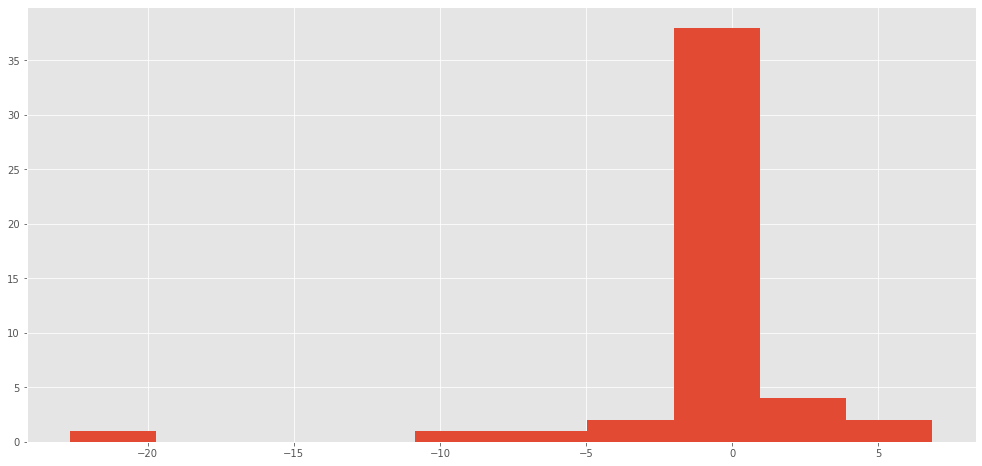

In [62]:
CableUK_comparison2_africa['price_change_USD 21-20'].hist()

In [63]:
CableUK_comparison2_africa.sort_values(by='price_change_USD 21-20')

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 23/03/2021),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,ISO-alpha2 code,Other groupings,country_name,country_code,gni_percap_cUSD,monthly_gni_pc_USD,2021 Average price of 1GB as share of GNI per capita %,2020 Average price of 1GB as share of GNI per capita %,2019 Average price of 1GB as share of GNI per capita %,price_change_USD 21-20
150,162,BJ,Benin,SUB-SAHARAN AFRICA,37,2000.000000,XOF,0.001806,3.612492,250.000000,...,BJ,LDC,Benin,BEN,1250.0,104.166667,3.467992,26.128302,20.146994,-22.660309
169,184,MG,Madagascar,SUB-SAHARAN AFRICA,36,19500.000000,MGA,0.000264,5.140877,2500.000000,...,MG,LDC,Madagascar,MDG,520.0,43.333333,11.863562,20.324731,16.704754,-8.461169
205,226,MW,Malawi,SUB-SAHARAN AFRICA,5,20000.000000,MWK,0.001273,25.463940,16000.000000,...,MW,LDC LLDC,Malawi,MWI,380.0,31.666667,80.412442,86.545768,11.337502,-6.133326
66,71,NE,Niger,SUB-SAHARAN AFRICA,22,709.600000,XOF,0.001806,1.281712,258.036364,...,NE,LDC LLDC,Niger,NER,600.0,50.000000,2.563424,6.598056,51.037353,-4.034632
109,117,SZ,Eswatini,SUB-SAHARAN AFRICA,9,33.333333,SZL,0.067201,2.240028,10.312500,...,SZ,LLDC,Eswatini,SWZ,3670.0,305.833333,0.732434,4.350871,1.716139,-3.618436
45,50,SN,Senegal,SUB-SAHARAN AFRICA,35,520.000000,XOF,0.001806,0.939248,166.666667,...,SN,LDC,Senegal,SEN,1460.0,121.666667,0.771985,2.711530,2.697986,-1.939545
154,167,BW,Botswana,SUB-SAHARAN AFRICA,30,43.250000,BWP,0.090565,3.916935,18.000000,...,BW,LLDC,Botswana,BWA,7650.0,637.500000,0.614421,2.175264,2.633870,-1.560843
81,89,AO,Angola,SUB-SAHARAN AFRICA,20,1000.000000,AOA,0.001605,1.605136,640.000000,...,AO,LDC,Angola,AGO,2960.0,246.666667,0.650731,2.146478,3.222644,-1.495748
43,48,CM,Cameroon,SUB-SAHARAN AFRICA,44,500.000000,XAF,0.001806,0.903123,333.333333,...,CM,NaN,Cameroon,CMR,1500.0,125.000000,0.722498,2.199352,1.370714,-1.476854
122,131,LR,Liberia,SUB-SAHARAN AFRICA,40,2.586770,USD,1.000000,2.586770,1.552795,...,LR,LDC,Liberia,LBR,580.0,48.333333,5.351938,6.724138,7.765549,-1.372200


### Before / after: actual prices

In [64]:
selection = CableUK_comparison2_africa[['country','2021 Average price of 1GB as share of GNI per capita %','2020 Average price of 1GB as share of GNI per capita %','2019 Average price of 1GB as share of GNI per capita %']]

CableUK_comparison2_africa_melted = selection.melt(id_vars=['country'], var_name = 'reference_year', value_name='price_USD')

smallmultiple_price_changes_absolute= alt.Chart(CableUK_comparison2_africa_melted).mark_bar(color='#BE232D').encode(
    #y='cases',
    alt.Y('price_USD:Q'),
    alt.X('reference_year', title =''),
    tooltip=['reference_year', 'price_USD'],
    color=alt.Color('reference_year:N',scale=alt.Scale(domain=['country','2021 Average price of 1GB as share of GNI per capita %','2020 Average price of 1GB as share of GNI per capita %','2019 Average price of 1GB as share of GNI per capita %'],range=["#002D5A","#008FE6",'#BE232D']))
    ).properties(
        width=150,
        height=150
    ).facet(
        facet='country:N',
        columns=5
    ).configure_axis(
        grid=False
    ).interactive()

#smallmultiple_price_changes.save('change.svg')
smallmultiple_price_changes_absolute

alt.FacetChart(...)

In [65]:
px.bar(CableUK_comparison2_africa.sort_values(by='price_change_USD 21-20',ascending = True),x='price_change_USD 21-20',y='country', width=1000, height=1000)

<AxesSubplot:ylabel='country'>

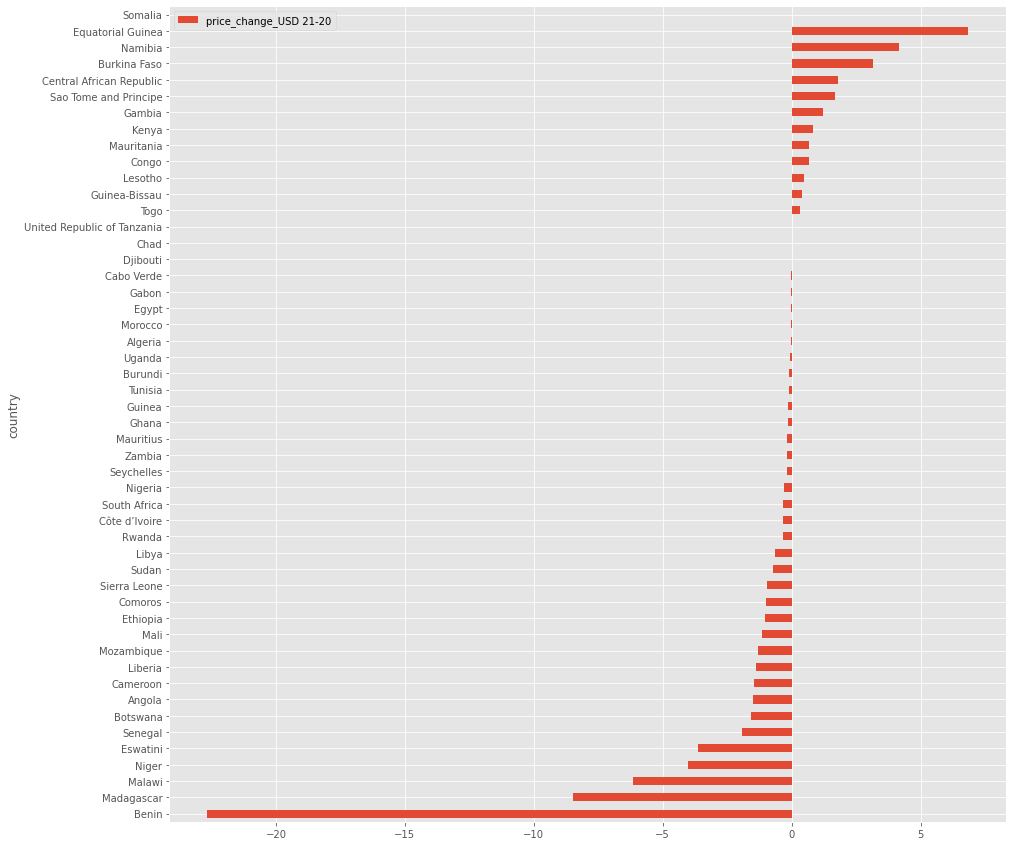

In [66]:
CableUK_comparison2_africa.sort_values(by='price_change_USD 21-20',ascending = True).plot(kind='barh', y='price_change_USD 21-20', x='country', figsize=(15,15))
#plt.savefig('charts/drafts/price_change.pdf', transparent = True)